In [1]:
#age.groupby("OWNCHAR_LABEL")["OWNER_RACE_LABEL"].value_counts()


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [ ]:
# business_char_fam = pd.read_csv('CSV/business_char_family_us.csv')

# races = ['Asian', 'Black or African American', 'American Indian and Alaska Native', 'Native Hawaiian and Other Pacific Islander']

# business_char_fam = business_char_fam[business_char_fam.race.isin(races)]

# business_char_fam = business_char_fam[business_char_fam.revenue != 'S']
# business_char_fam = business_char_fam[business_char_fam.revenue != 'W']

# business_char_fam = business_char_fam.convert_dtypes()

# # business_char_fam.dropna(inplace=True)
# business_char_fam['revenue'] = business_char_fam['revenue'].astype(np.int64, errors='ignore')

# # filtered_races = ["Asian"]
# # business_char_fam = business_char_fam[business_char_fam["race"].isin(filtered_races)]

# business_char_fam.groupby("firmpdnumber_of_employees_f")["race"].value_counts()
# # business_char_fam['firmpdnumber_of_employees_f'].value_counts()

# # business_char_fam['race'].value_counts()

# # plt.bar(business_char_fam['race'], business_char_fam['revenue'].astype(np.int64, errors='ignore'))
# # plt.xticks(rotation=50)
# # plt.show()


In [179]:
workers = pd.read_csv('CSV/business_char_workers_us.csv')

races = ['Asian', 'Black or African American', 'American Indian and Alaska Native', 'Native Hawaiian and Other Pacific Islander']
workers = workers[workers.race.isin(races)]

employment = ['Contractors/subcontractors/independent contractors/outside consultants', 'Full-time paid employees', 'Part-time paid employees']
workers = workers[workers.buschar_label.isin(employment)]

workers['annual_payroll'] = workers['annual_payroll'].astype(np.int64, errors='ignore')
workers['number_of_employees'] = workers['number_of_employees'].astype(np.int64, errors='ignore')

workers['pay_per_employee'] = round(workers['annual_payroll'] / workers['number_of_employees'])

workers = workers.groupby(['industry', 'race', 'buschar_label']).agg(pay_per_employee=('pay_per_employee', 'mean')).unstack()

# workers['pay_per_employee'] = workers['pay_per_employee'].fillna(workers.groupby(['industry', 'race', 'buschar_label'])['pay_per_employee'].transform('mean')).unstack()

# workers = workers.unstack().fillna(0)
workers.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 81 entries, ('Accommodation and food services', 'American Indian and Alaska Native') to ('Wholesale trade', 'Native Hawaiian and Other Pacific Islander')
Data columns (total 3 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   (pay_per_employee, Contractors/subcontractors/independent contractors/outside consultants)  41 non-null     float64
 1   (pay_per_employee, Full-time paid employees)                                                53 non-null     float64
 2   (pay_per_employee, Part-time paid employees)                                                52 non-null     float64
dtypes: float64(3)
memory usage: 2.4+ KB


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'pay_per_employee-Contractors/subcontractors/independent contractors/outside consultants'),
  Text(1.5, 0, 'pay_per_employee-Full-time paid employees'),
  Text(2.5, 0, 'pay_per_employee-Leased employees from leasing service or professional employer organization'),
  Text(3.5, 0, 'pay_per_employee-Paid day laborers'),
  Text(4.5, 0, 'pay_per_employee-Part-time paid employees'),
  Text(5.5, 0, 'pay_per_employee-Temporary staffing obtained from a temporary help service')])

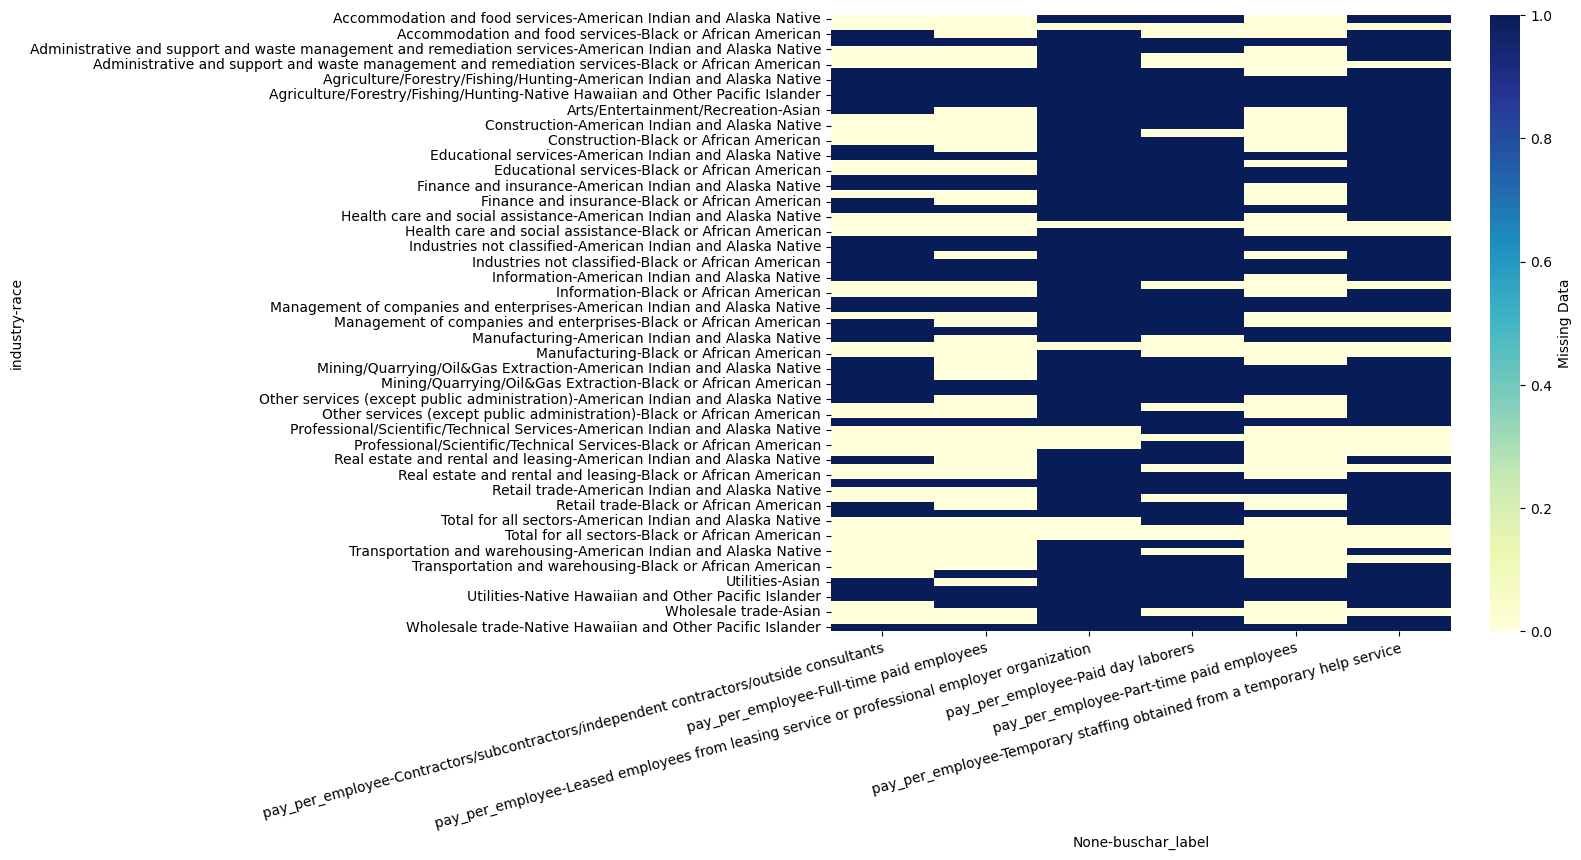

In [164]:
plt.figure(figsize=(10,8))
sns.heatmap(workers.isna(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)
plt.xticks(rotation=15, ha='right', rotation_mode='anchor')


In [200]:
customers = pd.read_csv('CSV/business_char_customers_us.csv')

# customers['firmpdnumber_of_employees_f'].fillna(value='0', inplace=True)

races = ['Black or African American', 'American Indian and Alaska Native', 'Native Hawaiian and Other Pacific Islander']
customers = customers[customers.race.isin(races)]

buyers = ['Individuals', 'Other businesses', 'State and local government', 'Other organizations', 'Federal government']
customers = customers[customers.buschar_label.isin(buyers)]

filtered_industries = ["Total for all sectors"]
customers = customers[~customers["industry"].isin(filtered_industries)]



customers = customers.groupby(['industry', 'race', 'buschar_label'])['number_of_firms'].count().unstack()

# customers = customers.groupby(['industry', 'race'])['revenue'].sum().unstack()

# customers.unstack(level=0).head()
# df = customers.groupby(["industry", "race"]).agg(revenue=("revenue", 'mean'))
# df = df.reset_index()

# foo.head()
# foo.drop('Unnamed: 0', axis=1, inplace=True)

# foo.head()

# foo.dropna(inplace=True)

# plt.figure(figsize = (15,8))

# sns.barplot(x = customers.columns.unstack(), data=customers)

# customers.plot(kind='bar', figsize=(9, 7), layout=(10, 10))
# plt.show()


AttributeError: 'Index' object has no attribute 'unstack'

<Figure size 1500x800 with 0 Axes>